<a href="https://colab.research.google.com/github/silasalebikenaba/silas.a.ayariga-pythonreport/blob/main/Smoking_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Modeling of Smoking Dynamics

This project implements a compartmental model to simulate the dynamics of smoking within a population. Using systems of Ordinary Differential Equations (ODEs), the model explores how the "smoking habit" spreads or declines based on transmission rates and quitting rates.

## Overview

The model categorizes the population into two proportions:
- **x**: Potential Smokers
- **y**: Current Smokers

The system is governed by the following equations:
- $dx/dt = \mu (1 - x) - \beta x y$
- $dy/dt = y (\beta x - \mu - \gamma)$

Where:
- $\mu$: Population exit/death rate.
- $\beta$: Contact/Transmission rate.
- $\gamma$: Quitting rate.

### Key Concepts
- **Basic Reproduction Number ($R_0$):** Calculated as $\beta / (\mu + \gamma)$.
- **Smoke-Free Equilibrium:** When $R_0 < 1$, the smoking population eventually disappears.
- **Endemic Equilibrium:** When $R_0 > 1$, the smoking habit persists at a stable level.

## Visualization
The simulation generates phase portraits showing trajectories from various initial conditions toward stable equilibria.

## Installation
```bash
pip install numpy matplotlib scipy

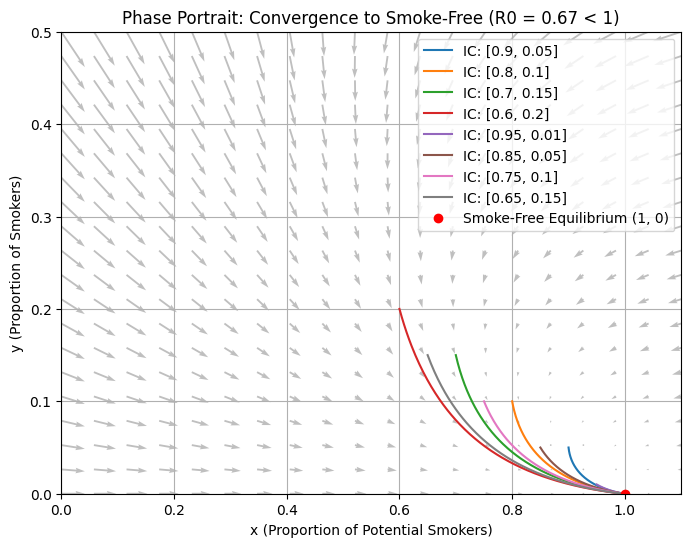

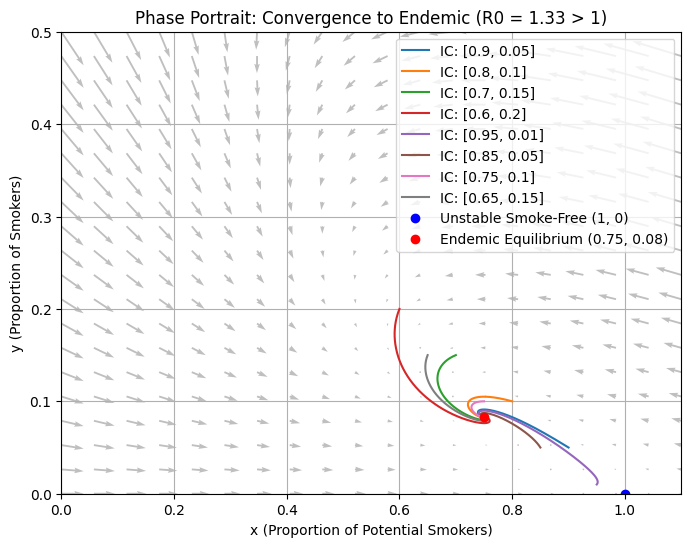

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the smoking model system in proportions: dx/dt = mu (1 - x) - beta x y, dy/dt = y (beta x - mu - gamma)
def smoking_system(state, t, mu, beta, gamma):
    x, y = state
    dxdt = mu * (1 - x) - beta * x * y
    dydt = y * (beta * x - mu - gamma)
    return [dxdt, dydt]

# Function to compute R0
def compute_R0(beta, mu, gamma):
    return beta / (mu + gamma)

# Parameters (adjustable)
mu = 0.25  # Exit rate (1/year)
gamma = 0.5  # Quitting rate (1/year)

# Time array for trajectories
t = np.linspace(0, 50, 1000)

# Initial conditions for trajectories (in (x, y) space, where x + y <= 1)
initial_conditions = [
    [0.9, 0.05], [0.8, 0.1], [0.7, 0.15], [0.6, 0.2],
    [0.95, 0.01], [0.85, 0.05], [0.75, 0.1], [0.65, 0.15]
]

# Plot for R0 < 1 (e.g., beta = 0.5, R0 ≈ 0.67)
beta_low = 0.5
R0_low = compute_R0(beta_low, mu, gamma)

fig_low, ax_low = plt.subplots(figsize=(8, 6))

# Solve and plot trajectories
for ic in initial_conditions:
    sol = odeint(smoking_system, ic, t, args=(mu, beta_low, gamma))
    ax_low.plot(sol[:, 0], sol[:, 1], label=f'IC: {ic}')

# Add vector field
x_grid, y_grid = np.meshgrid(np.linspace(0, 1.1, 20), np.linspace(0, 0.5, 20))
dxdt = mu * (1 - x_grid) - beta_low * x_grid * y_grid
dydt = y_grid * (beta_low * x_grid - mu - gamma)
ax_low.quiver(x_grid, y_grid, dxdt, dydt, color='gray', alpha=0.5)

# Equilibria
eq_smoke_free = (1, 0)
ax_low.plot(*eq_smoke_free, 'ro', label='Smoke-Free Equilibrium (1, 0)')

ax_low.set_xlabel('x (Proportion of Potential Smokers)')
ax_low.set_ylabel('y (Proportion of Smokers)')
ax_low.set_title(f'Phase Portrait: Convergence to Smoke-Free (R0 = {R0_low:.2f} < 1)')
ax_low.legend()
ax_low.grid(True)
ax_low.set_xlim(0, 1.1)
ax_low.set_ylim(0, 0.5)

# Plot for R0 > 1 (e.g., beta = 1.0, R0 ≈ 1.33)
beta_high = 1.0
R0_high = compute_R0(beta_high, mu, gamma)

# Compute endemic equilibrium: x* = 1/R0, y* = mu (R0 - 1) / (beta)
x_star = 1 / R0_high
y_star = mu * (R0_high - 1) / beta_high

fig_high, ax_high = plt.subplots(figsize=(8, 6))

# Solve and plot trajectories
for ic in initial_conditions:
    sol = odeint(smoking_system, ic, t, args=(mu, beta_high, gamma))
    ax_high.plot(sol[:, 0], sol[:, 1], label=f'IC: {ic}')

# Add vector field
dxdt = mu * (1 - x_grid) - beta_high * x_grid * y_grid
dydt = y_grid * (beta_high * x_grid - mu - gamma)
ax_high.quiver(x_grid, y_grid, dxdt, dydt, color='gray', alpha=0.5)

# Equilibria
ax_high.plot(*eq_smoke_free, 'bo', label='Unstable Smoke-Free (1, 0)')
ax_high.plot(x_star, y_star, 'ro', label=f'Endemic Equilibrium ({x_star:.2f}, {y_star:.2f})')

ax_high.set_xlabel('x (Proportion of Potential Smokers)')
ax_high.set_ylabel('y (Proportion of Smokers)')
ax_high.set_title(f'Phase Portrait: Convergence to Endemic (R0 = {R0_high:.2f} > 1)')
ax_high.legend()
ax_high.grid(True)
ax_high.set_xlim(0, 1.1)
ax_high.set_ylim(0, 0.5)

plt.show()

Interpretation of the Phase Portraits in the Smoking Model
Case 1: R₀ < 1 (example R₀ ≈ 0.67)
The phase portrait in the (x, y)-plane (where x = proportion of potential smokers, y = proportion of current smokers) shows that all orbits converge to the smoke-free equilibrium (x = 1, y = 0).
From any initial condition with y(0) > 0 and x(0) + y(0) ≤ 1, the trajectory moves toward the point (1, 0). The proportion of smokers y(t) decreases monotonically to zero, while the proportion of potential (non-smoking) students x(t) increases toward 1.
The vector field in the biologically relevant region (0 ≤ x ≤ 1, y ≥ 0) points consistently toward (1, 0). Near this point the flow becomes very slow, indicating asymptotic approach.
There are no closed orbits, no periodic solutions, and no interior stationary point that attracts trajectories. The dy/dt = 0 isocline lies at x = (μ + γ)/β = 1/R₀ > 1 (outside the square), so dy/dt < 0 whenever y > 0. Hence smoking always declines.
This shows that when the basic reproduction number is less than one, the smoking-free state is globally asymptotically stable. Even if smoking is introduced in small numbers, it cannot invade the population and eventually disappears. The school returns to a smoke-free equilibrium.
Case 2: R₀ > 1 (example R₀ ≈ 1.33)
When R₀ > 1, the phase portrait changes qualitatively. The smoke-free equilibrium (x = 1, y = 0) becomes unstable.
A new interior equilibrium appears at
x* = 1 / R₀ < 1,
y* = (μ / β) (R₀ − 1) > 0
(approximately x* ≈ 0.75, y* ≈ 0.08–0.10 for the parameter values used).
All (or almost all) orbits starting in the positive quadrant with x + y ≤ 1 converge to this endemic stationary point (x*, y*). Trajectories either approach it monotonically or show weakly damped behavior before settling.
The vector field points away from the smoke-free point (1, 0) and toward the endemic equilibrium (x*, y*). Near (x*, y*) the flow slows down, indicating that solutions approach this point asymptotically as t → ∞.
There are no closed orbits around the endemic equilibrium (unlike the Lotka–Volterra model). Instead, the interior equilibrium is asymptotically stable — small perturbations decay and the system returns to the positive steady state.
This demonstrates that when peer influence is strong enough (R₀ > 1), smoking can invade and becomes endemic: a constant positive proportion of students remains smokers in the long run. The endemic state attracts almost all biologically meaningful initial conditions.
Summary (in the style of the notes).
**The two phase portraits together reveal the threshold behavior of the model:**

If R₀ < 1, every orbit converges to the smoke-free equilibrium (x = 1, y = 0) → smoking dies out.
If R₀ > 1, the smoke-free state loses stability and almost every orbit converges to the endemic equilibrium (x* < 1, y* > 0) → smoking persists at a positive level.

This threshold at R₀ = 1 determines whether smoking behavior can be sustained in the high-school population or will eventually be eradicated which is analogous to how the stability of the interior equilibrium in predator prey models determines whether populations oscillate indefinitely or not, but here without neutral cycles and with clear attracting or repelling behavior.

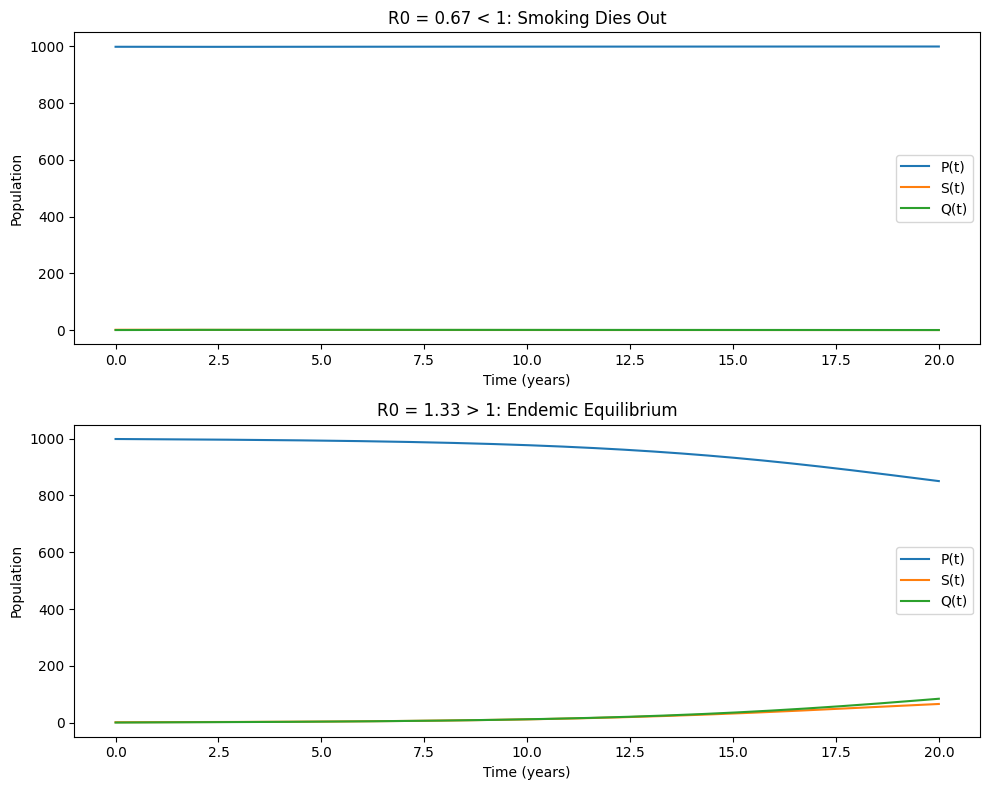

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Model function
def model(vars, t, mu, gamma, beta, N):
    P, S, Q = vars
    dPdt = mu * N - beta * P * S / N - mu * P
    dSdt = beta * P * S / N - (mu + gamma) * S
    dQdt = gamma * S - mu * Q
    return [dPdt, dSdt, dQdt]

# Parameters
mu = 0.25  # 1/year (avg 4 years in high school)
gamma = 0.5  # 1/year (avg 2 years smoking)
N = 1000
t = np.linspace(0, 20, 1000)  # Time in years
initial = [999, 1, 0]  # Initial: mostly potentials, 1 smoker

# Case 1: R0 < 1 (beta=0.5, R0=0.5/0.75 ≈0.67)
beta_low = 0.5
sol_low = odeint(model, initial, t, args=(mu, gamma, beta_low, N))
R0_low = beta_low / (mu + gamma)

# Case 2: R0 > 1 (beta=1.0, R0=1.0/0.75 ≈1.33)
beta_high = 1.0
sol_high = odeint(model, initial, t, args=(mu, gamma, beta_high, N))
R0_high = beta_high / (mu + gamma)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t, sol_low[:, 0], label='P(t)')
axs[0].plot(t, sol_low[:, 1], label='S(t)')
axs[0].plot(t, sol_low[:, 2], label='Q(t)')
axs[0].set_title(f'R0 = {R0_low:.2f} < 1: Smoking Dies Out')
axs[0].set_xlabel('Time (years)')
axs[0].set_ylabel('Population')
axs[0].legend()

axs[1].plot(t, sol_high[:, 0], label='P(t)')
axs[1].plot(t, sol_high[:, 1], label='S(t)')
axs[1].plot(t, sol_high[:, 2], label='Q(t)')
axs[1].set_title(f'R0 = {R0_high:.2f} > 1: Endemic Equilibrium')
axs[1].set_xlabel('Time (years)')
axs[1].set_ylabel('Population')
axs[1].legend()

plt.tight_layout()
plt.show()